## Linear Regresssion

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('healthdata.csv')


In [2]:
# Define features and target variable
X = data.drop('charges', axis=1)
y = data['charges']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),
        ('cat', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region'])
    ]
)

# Apply preprocessing to features
X_processed = preprocessor.fit_transform(X)


In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1070, 8)
Testing set size: (268, 8)


In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ 3.60914902e+03  2.05488506e+03  5.12478869e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]
Model Intercept: 8946.081982340911


In [5]:
# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate performance using R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² Score: {r2:.3f}")
print(f"RMSE: ${rmse:,.2f}")

R² Score: 0.784
RMSE: $5,796.28


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


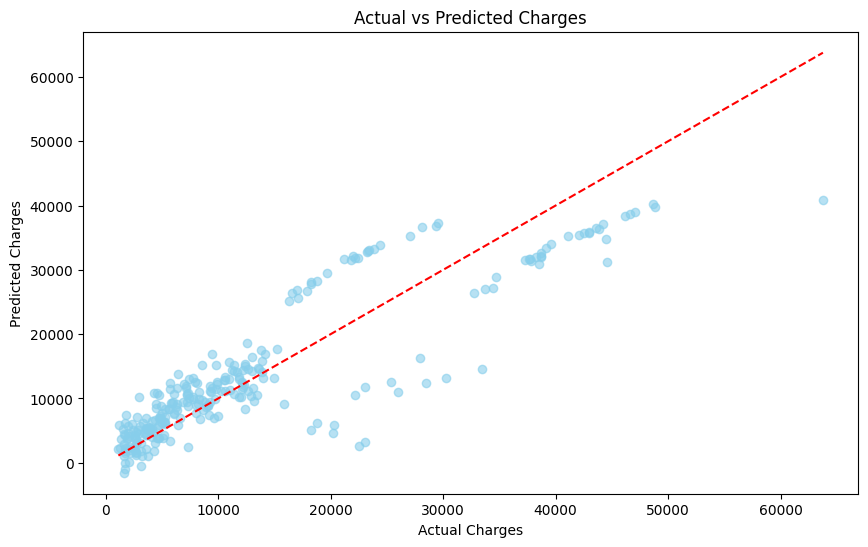

In [6]:
# Plot actual vs predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line (y=x)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

In [7]:
import joblib
joblib.dump(model, 'insurance_model.pkl')
joblib.dump(preprocessor, 'insurance_preprocessor.pkl')

['insurance_preprocessor.pkl']